# Project 1 - Titanic - Part III

The goal is to predict whether or not a passenger survived based on attributes such as their age, sex, passenger class, where they embarked and so on.

## 1) Upload this jupyter notebook page to your colab




## 2) Get the Shareable link for your page and update the URL below for your Jupyter Notebook:
- _Make sure you select __'Anyone with the Link'__ option_

__This jupyter notebook page is located at__:  https://colab.research.google.com/drive/1N91BML9d-Z31q-0LYNqtHIK3TkTiKHZ8?usp=sharing

We will click on the link above to visit to your Jupyter Notebook page.

## 3) Get the Data:
### Download the data (train.csv and test.csv files) from Kaggle and then upload them using the first code block below. 
- To download the files, login to [Kaggle](https://www.kaggle.com/) and go to the [Titanic challenge](https://www.kaggle.com/c/titanic)


Keep the following code block as it is. Use it to upload the donwloaded csv files and to save them into your colab:

In [2]:
from google.colab import files
import pandas as pd
import io
import os

train_data_dict = files.upload() #uploads as a disctionary and creates a file
os.remove('train.csv') #remove the file created during upload that is in the root folder
train_data = pd.read_csv(io.StringIO(train_data_dict['train.csv'].decode('utf-8')),sep=',') #get the data from the dictionary to the dataframe

test_data_dict = files.upload() #uploads as a disctionary and creates a file
os.remove('test.csv') #remove the file created during upload that is in the root folder
test_data = pd.read_csv(io.StringIO(test_data_dict['test.csv'].decode('utf-8')),sep=',') #get the data from the dictionary to the dataframe

titanic_dir_path = os.path.join("datasets", "titanic")
os.makedirs(titanic_dir_path, exist_ok=True) #create the folder
train_csv_path = os.path.join(titanic_dir_path, "train.csv") #create the path for the csv file 
test_csv_path = os.path.join(titanic_dir_path, "test.csv") #create the path for the csv file

train_data.to_csv(train_csv_path, index=False) #save the data to csv file
test_data.to_csv(test_csv_path, index=False) #save the data to csv file

Saving train.csv to train.csv


Saving test.csv to test (1).csv


Once you upload the data, they will be saved into the `datasets/titanic` directory. After uploading, you don't need to upload them again. You can start run your code starting the below code block.

In [226]:
import pandas as pd
import os

titanic_dir_path = os.path.join("datasets", "titanic")
train_csv_path = os.path.join(titanic_dir_path, "train.csv") #create the path for the csv file 
test_csv_path = os.path.join(titanic_dir_path, "test.csv") #create the path for the csv file

train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)
TestPassengerID = test_data['PassengerId']

## __The questions under section 4 were for Part I of the project and the questions under section 5, 6, 6, and 8 were for Part II. For this assignment, you need to answer the questions under section 6__.

## You can skip to 4.5, r

## Discover, Visualize, Prepare Data:

###	4.1) Which attributes do we have, and what are they meaning? List the attributes and then briefly explain. To get the description of the attributes, you can do a little research on the web. No code is needed to answer this question.
-------------------------------------


### 4.2) Show your results and explain the insights you got by studying the data with each of the following methods on both the train and test data (Note: I am not looking for a long list of insights, 2-3 insights per method execution would be fine):


#### 4.2.a.	head()


#### 4.2.b.	info()

#### 4.2.c.	describe()

#### 4.2.d.	value_counts()

### 4.3)	Prepare a DataFrame that contains the following numeric fields: Survided, Sex, Age, SibSp, Parch, Fare. Plot these numeric fields on a histogram. Did you notice anything new using the histogram?

### 4.4) Use groupby of Pandas to answer the following questions. 
For the following examples, use group by and plot for example:
> dataFrame.groupby(‘attribute1’)[‘attribute2’].median()

> dataFrame.groupby(‘attribute1’)[‘attribute2’].median().plot(kind=’bar’)


#### 4.4) a)	Find the average survival rate based on passenger class and plot the results.  What is the insight you gain? 



#### 4.4) b)	Find the average survival rate based on sex and plot the results. What is the insight?

#### 4.4) c) Find the median age by Pclass and Sex.

#### 4.4) d)	Find out the median fare based on passenger class and embarked place. 

##__4.5 includes the code (solutions) needed to start section 5.__

### 4.5) Work on missing values on the whole data set. Examples:
- https://towardsdatascience.com/machine-learning-with-the-titanic-dataset-7f6909e58280
PDF is attached to the assignment.

#### 4.5) a) Perform the followings:
- 1) Create a new 'all_data' frame by appending test data to train data. 

- 2) Using pandas methods see and show that some indexes repeat. Find a way to Use re-organize the index so that they are unique and do not have an extra 'index' column.

- 3) Then check the data using the info() method and list which columns have missing data (other than 'Survived')

In [4]:
all_data = train_data.append(test_data) # important
all_data.reset_index(inplace = True, drop = True) # reset the inde inplace and drop the created extra 'index' column
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### 4.5) b) Fill missing values of 'Age' field with the median age of the passenger class and sex that you found for the question above. Use the apply method with lambda function. 


In [5]:
# Fill in missing age information based on the median age for its class and sex.
all_data['Age'] = all_data.groupby(['Pclass','Sex'])['Age'].apply(lambda x : x.fillna(x.median()))
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### 4.5) d) Fill missing values of 'Cabin' field with the 'NA' value.

In [6]:
all_data.Cabin = all_data.Cabin.fillna('NA')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### 4.5) e) Fill missing values of 'Embarked' field with the most frequently seen 'Embarked' value.

In [7]:
# Fill in missing Embarked based on the most frequent Embarked
all_data['Embarked'].fillna(all_data['Embarked'].mode()[0], inplace = True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### 4.5) c) Fill missing values of 'Fare' field with the median fare of the passenger class and embarked location that you found for the question above. Use the apply method with lambda function. 

In [8]:
# Fill in missing fare based on its class and embarked place
all_data['Fare'] = all_data.groupby(['Pclass','Embarked'])['Fare'].apply(lambda x : x.fillna(x.median()))
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


# Next Questions are __for Part II__. 

## __Feature Engineering__

#### 5) 1) Create a new feature 'Family_Size'
- Create a new feature 'Family_Size' using other features (and also adding the person him/herself to the family size). 
- Then plot a bar chart to show how many of each 'Family_Size' value exists. 
- Finally plot a bar chart to show the relationship between 'Family_Size' and the 'Survival' 

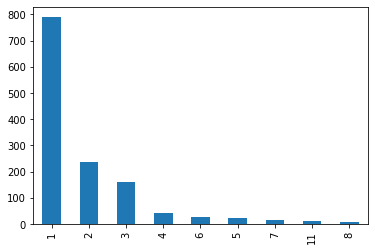

In [9]:
# Create a new feature by adding SibSp, Parch and the person herself. 
all_data['Family_Size'] = all_data['SibSp'] + all_data['Parch'] + 1

all_data['Family_Size'].value_counts().plot(kind='bar')

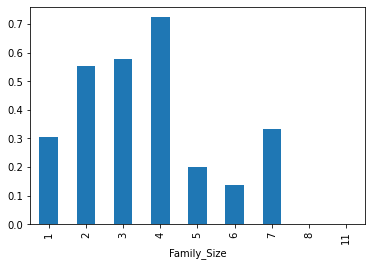

In [10]:
all_data[['Family_Size','Survived']].groupby('Family_Size')['Survived'].mean().plot(kind='bar')

#### 5) 2) Create a new feature 'Fare_Category'
- Use qcut method of Pandas for creating 'Fare_Category' field from Fare so that we have 5 categories of Fare. Note that: 1) With qcut We decompose a distribution so that there are (approximately) the same number of cases ineach category. 2) qcut returns categorical data and we need to convert it to string using astype(str). Otherwise one-hot-encoder question below might have issues.
- Use value_counts() method to show the results. 
- Plot a bar chart to show the relationship between 'Fare_Category' and the 'Survival'

In [11]:
results_categorical = pd.qcut(all_data['Fare'],5)
all_data['Fare_Category'] = pd.Series(results_categorical).astype(str)
all_data['Fare_Category'].value_counts()

(-0.001, 7.854]      275
(21.558, 41.579]     265
(41.579, 512.329]    259
(7.854, 10.5]        255
(10.5, 21.558]       255
Name: Fare_Category, dtype: int64

In [12]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1309 non-null   int64  
 1   Survived       891 non-null    float64
 2   Pclass         1309 non-null   int64  
 3   Name           1309 non-null   object 
 4   Sex            1309 non-null   object 
 5   Age            1309 non-null   float64
 6   SibSp          1309 non-null   int64  
 7   Parch          1309 non-null   int64  
 8   Ticket         1309 non-null   object 
 9   Fare           1309 non-null   float64
 10  Cabin          1309 non-null   object 
 11  Embarked       1309 non-null   object 
 12  Family_Size    1309 non-null   int64  
 13  Fare_Category  1309 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 143.3+ KB


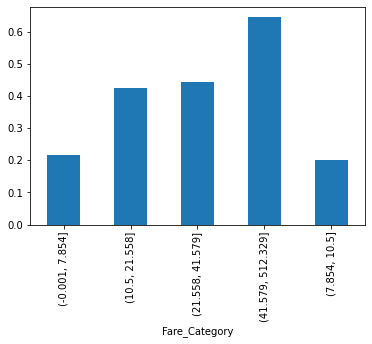

In [13]:
all_data[['Fare_Category','Survived']].groupby('Fare_Category')['Survived'].mean().plot(kind='bar')

#### 5) 3) Create a new feature 'Age_Category'
- Use cut method of Pandas for creating 'Age_Category' field from Age so that we have 5 categories of Age. Note that: 1) With cut, the bins are formed based on the values of the variable, regardless of how many cases fall into a category. 2) cut returns categorical data and we need to convert it to string using astype(str). Otherwise one-hot-encoder question below might have issues.

- Use value_counts() method to show the results. 
- Plot a bar chart to show the relationship between 'Age_Category' and the 'Survival'


In [14]:
results_categorical = pd.cut(all_data['Age'].astype(int),5)
all_data['Age_Category'] = pd.Series(results_categorical).astype(str)
all_data['Age_Category'].value_counts()

(16.0, 32.0]     752
(32.0, 48.0]     304
(-0.08, 16.0]    134
(48.0, 64.0]     106
(64.0, 80.0]      13
Name: Age_Category, dtype: int64

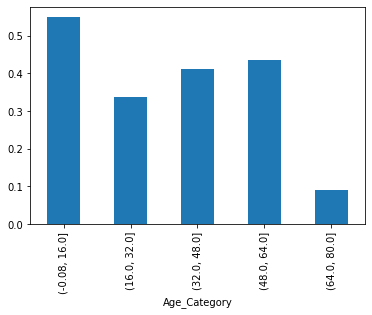

In [15]:
all_data[['Age_Category','Survived']].groupby('Age_Category')['Survived'].mean().plot(kind='bar')

### 6) Encoders


#### 6) 1) Using LabelEncoder, create the 'Sex_Numeric' based on the values of the 'Sex' attribute.

In [16]:
from sklearn.preprocessing import LabelEncoder
all_data['Sex_Numeric'] = LabelEncoder().fit_transform(all_data['Sex'])
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1309 non-null   int64  
 1   Survived       891 non-null    float64
 2   Pclass         1309 non-null   int64  
 3   Name           1309 non-null   object 
 4   Sex            1309 non-null   object 
 5   Age            1309 non-null   float64
 6   SibSp          1309 non-null   int64  
 7   Parch          1309 non-null   int64  
 8   Ticket         1309 non-null   object 
 9   Fare           1309 non-null   float64
 10  Cabin          1309 non-null   object 
 11  Embarked       1309 non-null   object 
 12  Family_Size    1309 non-null   int64  
 13  Fare_Category  1309 non-null   object 
 14  Age_Category   1309 non-null   object 
 15  Sex_Numeric    1309 non-null   int64  
dtypes: float64(3), int64(6), object(7)
memory usage: 163.8+ KB


#### 6) 2) Use OneHotEncoder to create new attributes for the 'Embarked' attribute.

Note: You can benefit from the following article for One-Hot-Encoding questions:
- https://towardsdatascience.com/machine-learning-with-the-titanic-dataset-7f6909e58280

In [17]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

def encode_category_to_numeric(feature,data_frame):
  encoded_feat = OneHotEncoder().fit_transform(data_frame[feature].values.reshape(-1,1)).toarray()
  #number_unique = data_frame[feature].nunique()
  unique_values = data_frame[feature].unique()
  sorted_unique_value = np.sort(unique_values)
  cols = ['{}_{}'.format(feature,value) for value in sorted_unique_value]
  encoded_data = pd.DataFrame(encoded_feat, columns=cols)
  return encoded_data

In [18]:
encoded_data = encode_category_to_numeric('Embarked',all_data)
all_data = pd.concat([all_data, encoded_data], axis=1)
encoded_data.info()
all_data.info()
all_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Embarked_C  1309 non-null   float64
 1   Embarked_Q  1309 non-null   float64
 2   Embarked_S  1309 non-null   float64
dtypes: float64(3)
memory usage: 30.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1309 non-null   int64  
 1   Survived       891 non-null    float64
 2   Pclass         1309 non-null   int64  
 3   Name           1309 non-null   object 
 4   Sex            1309 non-null   object 
 5   Age            1309 non-null   float64
 6   SibSp          1309 non-null   int64  
 7   Parch          1309 non-null   int64  
 8   Ticket         1309 non-null   object 
 9   Fare           1309 non-null   float64
 10  Cabin   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Fare_Category,Age_Category,Sex_Numeric,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,2,"(-0.001, 7.854]","(16.0, 32.0]",1,0.0,0.0,1.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,"(41.579, 512.329]","(32.0, 48.0]",0,1.0,0.0,0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,1,"(7.854, 10.5]","(16.0, 32.0]",0,0.0,0.0,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,"(41.579, 512.329]","(32.0, 48.0]",0,0.0,0.0,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,1,"(7.854, 10.5]","(32.0, 48.0]",1,0.0,0.0,1.0


#### 6) 3) Use OneHotEncoder to create new attributes for the 'Fare_Category' attribute.

In [19]:
encoded_data = encode_category_to_numeric('Fare_Category',all_data)
all_data = pd.concat([all_data, encoded_data], axis=1)
encoded_data.info()
all_data.info()
all_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Fare_Category_(-0.001, 7.854]    1309 non-null   float64
 1   Fare_Category_(10.5, 21.558]     1309 non-null   float64
 2   Fare_Category_(21.558, 41.579]   1309 non-null   float64
 3   Fare_Category_(41.579, 512.329]  1309 non-null   float64
 4   Fare_Category_(7.854, 10.5]      1309 non-null   float64
dtypes: float64(5)
memory usage: 51.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PassengerId                      1309 non-null   int64  
 1   Survived                         891 non-null    float64
 2   Pclass                           1309 non-null   int64  
 3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Fare_Category,Age_Category,Sex_Numeric,Embarked_C,Embarked_Q,Embarked_S,"Fare_Category_(-0.001, 7.854]","Fare_Category_(10.5, 21.558]","Fare_Category_(21.558, 41.579]","Fare_Category_(41.579, 512.329]","Fare_Category_(7.854, 10.5]"
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,2,"(-0.001, 7.854]","(16.0, 32.0]",1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,"(41.579, 512.329]","(32.0, 48.0]",0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,1,"(7.854, 10.5]","(16.0, 32.0]",0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,"(41.579, 512.329]","(32.0, 48.0]",0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,1,"(7.854, 10.5]","(32.0, 48.0]",1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### 6) 4) Use OneHotEncoder to create new attributes for the 'Age_Category' attribute.

In [20]:
encoded_data = encode_category_to_numeric('Age_Category',all_data)
all_data = pd.concat([all_data, encoded_data], axis=1)
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age_Category_(-0.08, 16.0]  1309 non-null   float64
 1   Age_Category_(16.0, 32.0]   1309 non-null   float64
 2   Age_Category_(32.0, 48.0]   1309 non-null   float64
 3   Age_Category_(48.0, 64.0]   1309 non-null   float64
 4   Age_Category_(64.0, 80.0]   1309 non-null   float64
dtypes: float64(5)
memory usage: 51.3 KB


In [21]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PassengerId                      1309 non-null   int64  
 1   Survived                         891 non-null    float64
 2   Pclass                           1309 non-null   int64  
 3   Name                             1309 non-null   object 
 4   Sex                              1309 non-null   object 
 5   Age                              1309 non-null   float64
 6   SibSp                            1309 non-null   int64  
 7   Parch                            1309 non-null   int64  
 8   Ticket                           1309 non-null   object 
 9   Fare                             1309 non-null   float64
 10  Cabin                            1309 non-null   object 
 11  Embarked                         1309 non-null   object 
 12  Family_Size         

#### 6) 5) Use OneHotEncoder to create new attributes for the 'PClass' attribute.

In [22]:
encoded_data = encode_category_to_numeric('Pclass',all_data)
all_data = pd.concat([all_data, encoded_data], axis=1)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PassengerId                      1309 non-null   int64  
 1   Survived                         891 non-null    float64
 2   Pclass                           1309 non-null   int64  
 3   Name                             1309 non-null   object 
 4   Sex                              1309 non-null   object 
 5   Age                              1309 non-null   float64
 6   SibSp                            1309 non-null   int64  
 7   Parch                            1309 non-null   int64  
 8   Ticket                           1309 non-null   object 
 9   Fare                             1309 non-null   float64
 10  Cabin                            1309 non-null   object 
 11  Embarked                         1309 non-null   object 
 12  Family_Size         

### 6) 6) Convert 'Sex_Numeric' and 'Family_Size' fields to 'float16'.

In [23]:
all_data['Sex_Numeric'] = all_data['Sex_Numeric'].astype(np.float16)
all_data['Family_Size'] = all_data['Family_Size'].astype(np.float16)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PassengerId                      1309 non-null   int64  
 1   Survived                         891 non-null    float64
 2   Pclass                           1309 non-null   int64  
 3   Name                             1309 non-null   object 
 4   Sex                              1309 non-null   object 
 5   Age                              1309 non-null   float64
 6   SibSp                            1309 non-null   int64  
 7   Parch                            1309 non-null   int64  
 8   Ticket                           1309 non-null   object 
 9   Fare                             1309 non-null   float64
 10  Cabin                            1309 non-null   object 
 11  Embarked                         1309 non-null   object 
 12  Family_Size         

### 7) 1) Create the correlation matrix for the all_data data frame and show the values for 'Survived' column in an descending order.

In [24]:
corr_matrix = all_data.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived                           1.000000
Pclass_1                           0.285904
Fare_Category_(41.579, 512.329]    0.263007
Fare                               0.257307
Embarked_C                         0.168240
Age_Category_(-0.08, 16.0]         0.121485
Pclass_2                           0.093349
Parch                              0.081629
Fare_Category_(21.558, 41.579]     0.062529
Fare_Category_(10.5, 21.558]       0.043153
Age_Category_(32.0, 48.0]          0.032801
Age_Category_(48.0, 64.0]          0.030350
Family_Size                        0.016639
Embarked_Q                         0.003650
PassengerId                       -0.005007
SibSp                             -0.035322
Age                               -0.058635
Age_Category_(64.0, 80.0]         -0.067344
Age_Category_(16.0, 32.0]         -0.106821
Embarked_S                        -0.149683
Fare_Category_(-0.001, 7.854]     -0.171109
Fare_Category_(7.854, 10.5]       -0.191707
Pclass_3                        

### 7) 2) Based on the correlation matrix results, identify some of the features as unimportant and drop them and assign the remaining DataFrame to the variable named 'important_data'. When you drop features, leave at least 10 columns besides 'Survivided' in the 'important_data' DataFrame. After that, check the correlation to 'Survived' as you did before.

In [25]:
# drop the unimportant colums and leave at least 10 columns besides 'Survivided'
drop_columns = ['Name', 'Sex', 'Age', 'Cabin', 'Embarked', 'Ticket', 
                'Embarked_Q', 'Family_Size', 'Fare_Category', 
                'Age_Category','Age_Category_(48.0, 64.0]', 'Age_Category_(32.0, 48.0]', 
                'SibSp', 'Age', 'Age_Category_(64.0, 80.0]', 
                'Fare_Category_(10.5, 21.558]', 'Fare_Category_(21.558, 41.579]', 'Parch']

In [26]:
important_data = all_data.drop(columns = drop_columns)
important_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PassengerId                      1309 non-null   int64  
 1   Survived                         891 non-null    float64
 2   Pclass                           1309 non-null   int64  
 3   Fare                             1309 non-null   float64
 4   Sex_Numeric                      1309 non-null   float16
 5   Embarked_C                       1309 non-null   float64
 6   Embarked_S                       1309 non-null   float64
 7   Fare_Category_(-0.001, 7.854]    1309 non-null   float64
 8   Fare_Category_(41.579, 512.329]  1309 non-null   float64
 9   Fare_Category_(7.854, 10.5]      1309 non-null   float64
 10  Age_Category_(-0.08, 16.0]       1309 non-null   float64
 11  Age_Category_(16.0, 32.0]        1309 non-null   float64
 12  Pclass_1            

In [27]:
corr_matrix = important_data.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived                           1.000000
Pclass_1                           0.285904
Fare_Category_(41.579, 512.329]    0.263007
Fare                               0.257307
Embarked_C                         0.168240
Age_Category_(-0.08, 16.0]         0.121485
Pclass_2                           0.093349
PassengerId                       -0.005007
Age_Category_(16.0, 32.0]         -0.106821
Embarked_S                        -0.149683
Fare_Category_(-0.001, 7.854]     -0.171109
Fare_Category_(7.854, 10.5]       -0.191707
Pclass_3                          -0.322308
Pclass                            -0.338481
Sex_Numeric                       -0.543351
Name: Survived, dtype: float64

### 8) 1) Create X_train, Y_train and X_test DataFrames. Note that X_train should have 891 instances and the rest should go to X_test. Drop the 'Survived' from X_test. Check the X_train, X_test and Y_train.

In [28]:
X_train = important_data.loc[:890].drop(['Survived'], axis = 1)
Y_train = important_data.loc[:890]['Survived'].values
X_test = important_data.loc[891:].drop(['Survived'], axis = 1)

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PassengerId                      891 non-null    int64  
 1   Pclass                           891 non-null    int64  
 2   Fare                             891 non-null    float64
 3   Sex_Numeric                      891 non-null    float16
 4   Embarked_C                       891 non-null    float64
 5   Embarked_S                       891 non-null    float64
 6   Fare_Category_(-0.001, 7.854]    891 non-null    float64
 7   Fare_Category_(41.579, 512.329]  891 non-null    float64
 8   Fare_Category_(7.854, 10.5]      891 non-null    float64
 9   Age_Category_(-0.08, 16.0]       891 non-null    float64
 10  Age_Category_(16.0, 32.0]        891 non-null    float64
 11  Pclass_1                         891 non-null    float64
 12  Pclass_2              

In [30]:
Y_train

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0.

In [31]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PassengerId                      418 non-null    int64  
 1   Pclass                           418 non-null    int64  
 2   Fare                             418 non-null    float64
 3   Sex_Numeric                      418 non-null    float16
 4   Embarked_C                       418 non-null    float64
 5   Embarked_S                       418 non-null    float64
 6   Fare_Category_(-0.001, 7.854]    418 non-null    float64
 7   Fare_Category_(41.579, 512.329]  418 non-null    float64
 8   Fare_Category_(7.854, 10.5]      418 non-null    float64
 9   Age_Category_(-0.08, 16.0]       418 non-null    float64
 10  Age_Category_(16.0, 32.0]        418 non-null    float64
 11  Pclass_1                         418 non-null    float64
 12  Pclass_2           

In [32]:
X_train.head()

,PassengerId,Pclass,Fare,Sex_Numeric,Embarked_C,Embarked_S,"Fare_Category_(-0.001, 7.854]","Fare_Category_(41.579, 512.329]","Fare_Category_(7.854, 10.5]","Age_Category_(-0.08, 16.0]","Age_Category_(16.0, 32.0]",Pclass_1,Pclass_2,Pclass_3
0,1,3,7.2500,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,1,71.2833,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,3,7.9250,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,4,1,53.1000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,3,8.0500,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### 8) 2) Use StandardScaler of Scikit Learn to scale the 'Fare' feature of both X_train and X_test. 

In [33]:
from sklearn.preprocessing import StandardScaler
X_train['Fare'] = pd.DataFrame(data = StandardScaler().fit_transform( pd.DataFrame(X_train['Fare']) ), 
                       columns = ['Fare'], 
                       index = X_train.index)

In [34]:
X_train.head()

,PassengerId,Pclass,Fare,Sex_Numeric,Embarked_C,Embarked_S,"Fare_Category_(-0.001, 7.854]","Fare_Category_(41.579, 512.329]","Fare_Category_(7.854, 10.5]","Age_Category_(-0.08, 16.0]","Age_Category_(16.0, 32.0]",Pclass_1,Pclass_2,Pclass_3
0,1,3,-0.502445,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,1,0.786845,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,3,-0.488854,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,4,1,0.420730,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,3,-0.486337,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [35]:
X_test['Fare'] = pd.DataFrame(data = StandardScaler().fit_transform( pd.DataFrame(X_test['Fare']) ), 
                       columns = ['Fare'], 
                       index = X_test.index)
X_test.head()

,PassengerId,Pclass,Fare,Sex_Numeric,Embarked_C,Embarked_S,"Fare_Category_(-0.001, 7.854]","Fare_Category_(41.579, 512.329]","Fare_Category_(7.854, 10.5]","Age_Category_(-0.08, 16.0]","Age_Category_(16.0, 32.0]",Pclass_1,Pclass_2,Pclass_3
891,892,3,-0.497079,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
892,893,3,-0.511942,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
893,894,2,-0.463770,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
894,895,3,-0.482143,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
895,896,3,-0.417167,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### 9) 1) For each of the algorithms, use Scikit-Learn's cross-validation feature to measure the performance and print out mean and std for each algoritm:

1. Stochastic Gradient Descent (SGD)
2. LogisticRegression
3. Support Vector Machine (kernel='linear' parameter)
4. Support Vector Machine (kernel = 'rbf' parameter)
5. DecisionTreeClassifier
6. RandomForestClassifier
7. ExtraTreesClassifier
8. AdaBoostClassifier
9. GradientBoostingClassifier
10. XGBoost
-- You can import XGBoost library as follows:  "from xgboost import XGBClassifier"

Parameters:
- Set the scoring parameter of cross-validation to 'f1'
- Use the default cv = 5 parameter of cross-validation
- Use random_state = 42 for initializing model algorithms
- Use the kernel parameter indicated above for SVM algorithms
- For others, use the default parameters (no need to specify explicitly)


In [98]:

from xgboost import XGBClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

from sklearn.metrics import (confusion_matrix, accuracy_score) 
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
K_fold = StratifiedKFold(n_splits=10)


In [112]:
random_state = 42
ADA_Model = AdaBoostClassifier(random_state = 42)

scores = cross_val_score(ADA_Model, X_train, Y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'f1')

print(scores)
round(np.mean(scores)*100, 2)

[0.41111111 0.69662921 0.7752809  0.64044944 0.79775281 0.79775281
 0.80898876 0.80898876 0.80898876 0.6741573 ]


72.2

In [155]:

GBC_Model = GradientBoostingClassifier(random_state = 42)

scores1 = cross_val_score(GBC_Model, X_train, Y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'f1')

print(scores1)
round(np.mean(scores1)*100, 2)



[0.78888889 0.71910112 0.78651685 0.70786517 0.79775281 0.82022472
 0.83146067 0.76404494 0.80898876 0.79775281]


78.23

In [154]:
np.std(scores1)

0.03869624423982121

In [170]:

XGB_Model = XGBClassifier(random_state = 42)

scores2 = cross_val_score(XGB_Model, X_train, Y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'f1')

print(scores2)
round(np.mean(scores2)*100, 2)

[nan nan nan nan nan nan nan nan nan nan]


nan

In [156]:
np.std(scores2)

nan

In [171]:

SVC_model = SVC(random_state = 42,kernel = 'rbf')


scores3 = cross_val_score(SVC_model, X_train, Y_train, cv = 5, 
                        n_jobs=4, scoring='f1')

print(scores3)
round(np.mean(scores3)*100, 2)

[0. 0. 0. 0. 0.]


0.0

In [ ]:
np.std(scores3)

In [159]:


RFC_model = RandomForestClassifier(n_estimators=10,random_state = 42)
scores4 = cross_val_score(RFC_model, X_train, Y_train, cv=K_fold, 
                        n_jobs=4, scoring='f1')

print(scores4)
round(np.mean(scores4)*100, 2)

[0.8        0.75280899 0.70786517 0.74157303 0.83146067 0.79775281
 0.82022472 0.85393258 0.76404494 0.82022472]


78.9

In [158]:
np.std(scores4)

0.04351028389873906

In [137]:
ETC_model = ExtraTreesClassifier(random_state = 42)

scores5 = cross_val_score(ETC_model, X_train, Y_train, cv=K_fold, 
                        n_jobs=4, scoring='f1')

print(scores5)
round(np.mean(scores5)*100, 2)

[0.73333333 0.75280899 0.71910112 0.7752809  0.85393258 0.7752809
 0.7752809  0.80898876 0.78651685 0.79775281]


77.78

In [160]:
np.std(scores5)

0.03648209235699898

In [82]:
LR_model = LogisticRegression(random_state = 42)

scores6 = cross_val_score(LR_model, X_train, Y_train, cv=K_fold, 
                        n_jobs=4, scoring='f1')

print(scores6)
round(np.mean(scores6)*100, 2)

[0.76666667 0.74157303 0.74157303 0.85393258 0.78651685 0.78651685
 0.78651685 0.76404494 0.80898876 0.79775281]


78.34

In [161]:
np.std(scores6)

0.03165184028446196

In [83]:
DTC_model = DecisionTreeClassifier(random_state = 42)

scores7 = cross_val_score(DTC_model, X_train, Y_train, cv=K_fold, 
                        n_jobs=4, scoring='f1')

print(scores7)
round(np.mean(scores7)*100, 2)


[0.63333333 0.76404494 0.71910112 0.59550562 0.62921348 0.70786517
 0.7752809  0.78651685 0.62921348 0.79775281]


70.38

In [162]:
np.std(scores7)

0.07244194136917287

In [114]:
SGDC_model = SGDClassifier(random_state = 42)

scores8 = cross_val_score(SGDC_model, X_train, Y_train, cv=K_fold, 
                        n_jobs=4, scoring='f1')

print(scores8)
round(np.mean(scores8)*100, 2)

[0.61111111 0.50561798 0.75280899 0.65168539 0.38202247 0.38202247
 0.38202247 0.61797753 0.38202247 0.39325843]


50.61

In [163]:
np.std(scores8)

0.13413378066751483

In [164]:
SVM_model = SVC(random_state = 42, kernel = 'linear')


scores9 = cross_val_score(SVM_Model, X_train, Y_train, cv = 5, 
                        n_jobs=4, scoring='f1')

print(scores9)
round(np.mean(scores9)*100, 2)

[0. 0. 0. 0. 0.]


0.0

In [165]:
np.std(scores9)

0.0

### 9) 2) Select the top 3 best performing classifiers. List them along with their mean and std scores. For these top 3 best performing classifiers, find the best hyperparameters using GridSearchCV.

- Use estimator.get_params().keys() or the API description of the classifiers to find out which hyperparameters you can use. 
- Use the same scoring parameter ('f1') and use cv = 10 this time. 
- Print out the best_estimator_ and best_score_ results of your Grid Search
- Use the following hyparparameter options if they fit for your top 3 classifiers:

n_estimators = [300, 400, 500]

learning_rate = [0.3, 0.1, 0.05]

max_features =  [1, 0.5, 0.3]

subsample = [1, 0.5, 0.3]

max_samples = [1, 0.5, 0.3]

bootstrap = [True,False]

In [200]:
# LogisticRegression Parameters tunning 
LRM = LogisticRegression()

## Search grid for optimal parameters
lr_param_grid = {
    
}


gsLRM = GridSearchCV(LRM, param_grid = lr_param_grid, cv=10,
                     scoring="f1", n_jobs= 4, verbose = 1)

gsLRM.fit(X_train,Y_train)
LRM_best = gsLRM.best_estimator_


# Best estimate 
LRM_best

# Best score
gsLRM.best_score_

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7055460658194767

In [209]:
np.std(scores6)

0.05412005189002416

In [190]:

# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"n_estimators": [300, 400, 500],
"max_features":[1, 0.5, 0.3],
"max_samples":[1, 0.5, 0.3],}


gsRFC = GridSearchCV(RFC_model, param_grid = rf_param_grid, cv=10,
                     scoring="f1", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train, Y_train)

RFC_best = gsRFC.best_estimator_


# Best estimate 
RFC_best

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   23.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 270 out of 270 | elapsed:  2.5min finished


0.7459910250471242

In [208]:
np.std(scores4)

0.07073878686901748

In [192]:
# Gradient boosting tunning
GBC = GradientBoostingClassifier()
gb_param_grid = {"n_estimators": [300, 400, 500],
"learning_rate":[0.3, 0.1, 0.05],
"max_features":[1, 0.5, 0.3],
"subsample":[1, 0.5, 0.3],
}

gsGBC = GridSearchCV(GBC, param_grid = gb_param_grid, cv=10, 
                     scoring="f1", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)
GBC_best = gsGBC.best_estimator_

# Best estimate 
GBC_best 

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   12.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   57.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done 810 out of 810 | elapsed:  4.0min finished


0.7391247476359584

In [210]:
np.std(scores1)

0.09398624944591

### 9) 3) Use VotingClassifier of sklearn to create an ensemble learner that utilizes the top 3 estimators you found above. Set the voting parameter to 'soft'. Use cross_val_score to calculate its score and print out its mean and std values. The following page might be useful:

Kaggl Titanic: A Machine Learning from Disaster | Modelling Part 2: 
https://www.codementor.io/@innat_2k14/kaggl-titanic-a-machine-learning-from-disaster-modelling-part-2-10gfjtm0p3


In [204]:
VotingPredictor = VotingClassifier(estimators =
                           [('rfc', RFC_best), 
                            ('gbc', GBC_best),
                            ('lrm', LRM_best)],
                           voting='soft', n_jobs = 4)


VotingPredictor = VotingPredictor.fit(X_train, Y_train)

scores10 = cross_val_score(VotingPredictor, X_train, Y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores10)
print(round(np.mean(scores10)*100, 2))

[0.8        0.80898876 0.76404494 0.85393258 0.88764045 0.82022472
 0.83146067 0.78651685 0.79775281 0.83146067]
81.82


In [205]:
np.std(scores10)

0.03350425396058493

### 9) 4) Use the VotingClassifier you created above to predict 'Survived' for the X_test.

In [242]:
Predictive_Model = pd.DataFrame({
        "PassengerId": TestPassengerID,
        "Survived": VotingPredictor.predict(X_test)
        })
Predictive_Model

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


### 9) 5) Prepare a csv file to submit to kaggle.com. Submit it and then put your results here. You can put the screenshot of your score here. Even if your score is not good, you will get full points as long as you show that you submitted your solution.

In [250]:
Predictive_Model.to_csv('file_name.csv')

Predictive_Model.to_csv('C:/Users/tomli/Desktop/file_name.csv')

FileNotFoundError: ignored

### 9) 6) Think of what you can do extra to improve your results. You can suggest new cleaning methods, new features, new hyperparameters, new models, etc. In short, you can suggest anything to improve the results. Describe the rationale behind your suggestions. Be specific, a general suggesstion like 'do more feature engineering' or 'have better hyperparameters' is not accepted. Have three suggestions to get the full point.

In [245]:
import pandas as pd

data = {'Product': ['Desktop Computer','Tablet','Printer','Laptop'],
        'Price': [850,200,150,1300]
        }

df = pd.DataFrame(data, columns= ['Product', 'Price'])

df.to_csv (r'C:\Users\tomli\Desktop\export_dataframe.csv', index = False, header=True)

print (df)

            Product  Price
0  Desktop Computer    850
1            Tablet    200
2           Printer    150
3            Laptop   1300


### 9) 7) (Bonus) Implement those idea(s) and then make another submission. Put the screenshot of your new score here.

### 9) 8) (Extra Bonus) If you have more great ideas (more than the three described above), describe them with their rationale here. Describe at least two ideas to get the full extra bonus points

### 9) 9) (Extra Extra Bonus) Implement your ideas described for the previous question, make another submission and then put your results here. Your idea does not have to perform better. Just explain why you thought it might perform better.

## 10) Run all of your code and get your output

## 11) Print the latest status of your notebook to a pdf file 
- DO NOT FORGET: The pdf file __must include the link of your jupyter notebook page__ (see step 2 above)

## 12) __Submit the PDF__ file on Canvas